In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Import dataset

In [2]:
df = pd.read_csv("data/Speed_Dating_Data.csv", 
                                   encoding="latin-1", 
                                   dtype_backend="numpy_nullable")

# Profil socio-démographique des participants 

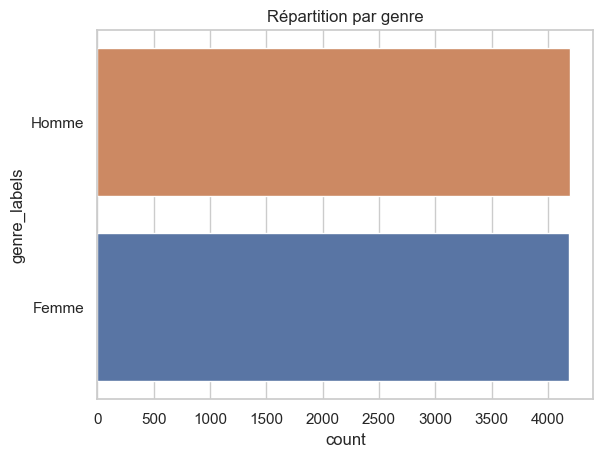

In [13]:
# Genre : proportion hommes / femmes
genre_labels = {
    0:"Femme", 1:"Homme"
}
df["genre_labels"] = df["gender"].map(genre_labels)

sns.countplot(y="genre_labels", data=df, order=df["genre_labels"].value_counts().index, hue="genre_labels")
plt.title("Répartition par genre")
plt.show()

In [14]:
df["genre_labels"].value_counts(normalize=True) * 100

genre_labels
Homme    50.05968
Femme    49.94032
Name: proportion, dtype: float64

In [15]:
# Age : moyenne, médiane, distribution.
df["age"].describe()

count       8283.0
mean     26.358928
std       3.566763
min           18.0
25%           24.0
50%           26.0
75%           28.0
max           55.0
Name: age, dtype: Float64

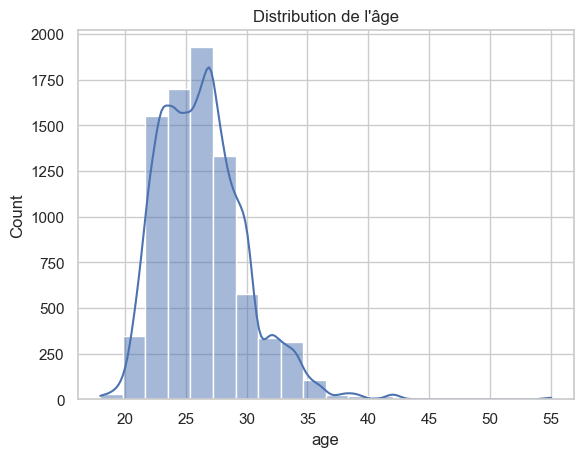

In [16]:
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Distribution de l'âge")
plt.show()

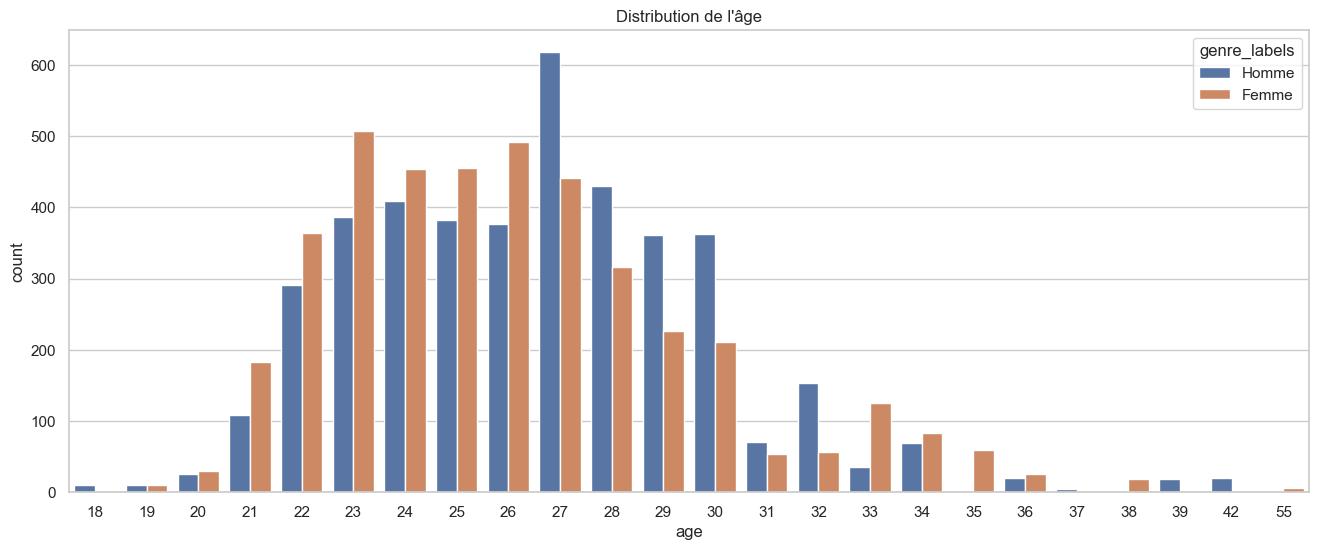

In [17]:
plt.figure(figsize=(16, 6))
plt.title("Distribution de l'âge")
sns.categorical.countplot(x="age", hue= "genre_labels", data=df)
plt.show()

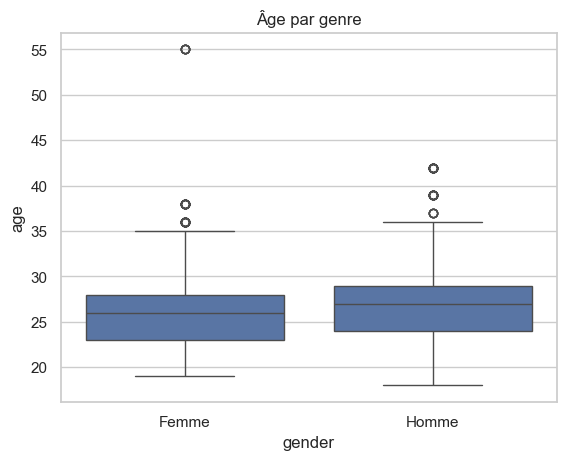

In [18]:
sns.boxplot(x="gender", y="age", data=df)
plt.xticks([0,1], ["Femme", "Homme"])
plt.title("Âge par genre")
plt.show()

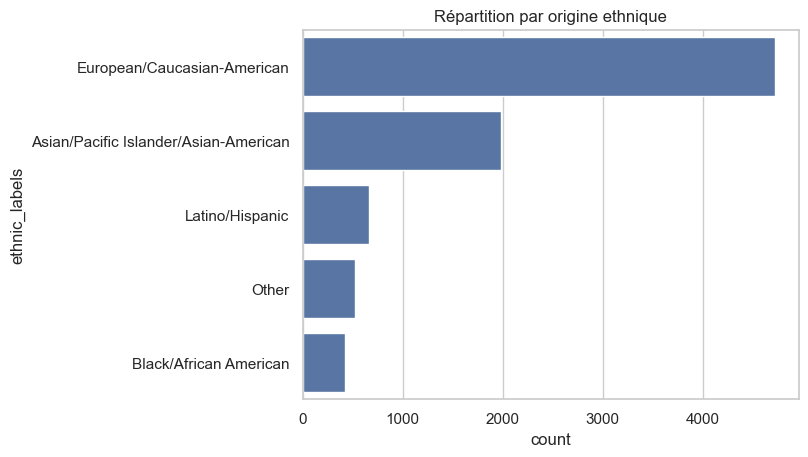

In [19]:
# origine ethnique : répartition
ethnic_labels = {
    1:"Black/African American", 2:"European/Caucasian-American", 3:"Latino/Hispanic", 
    4:"Asian/Pacific Islander/Asian-American", 5:"Native American", 6:"Other"
}
df["ethnic_labels"] = df["race"].map(ethnic_labels)

sns.countplot(y="ethnic_labels", data=df, order=df["ethnic_labels"].value_counts().index)
plt.title("Répartition par origine ethnique")
plt.show()

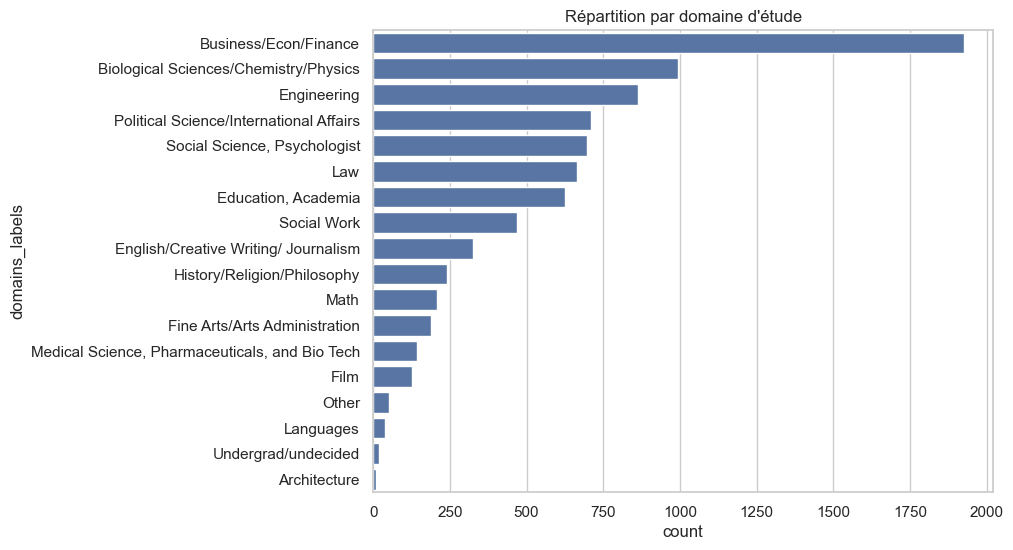

In [20]:
# Dommaines d'études / carrière : domaines d’études / carrières dominantes
domains_labels = {
    1:"Law", 2:"Math", 3:"Social Science, Psychologist", 4:"Medical Science, Pharmaceuticals, and Bio Tech", 
    5:"Engineering", 6:"English/Creative Writing/ Journalism", 7:"History/Religion/Philosophy", 
    8:"Business/Econ/Finance", 9:"Education, Academia", 10:"Biological Sciences/Chemistry/Physics", 
    11:"Social Work", 12:"Undergrad/undecided", 13:"Political Science/International Affairs", 14:"Film", 
    15:"Fine Arts/Arts Administration", 16:"Languages", 17:"Architecture", 18:"Other"
}
df["domains_labels"] = df["field_cd"].map(domains_labels)

plt.figure(figsize=(8,6))
sns.countplot(y="domains_labels", data=df, order=df["domains_labels"].value_counts().index)
plt.title("Répartition par domaine d'étude")
plt.show()


In [21]:
df["income"] = (
    df["income"]
      .str.replace(",", "", regex=False)
      .astype(float)
)

In [22]:
print(df["income"])
print(df["income"].dtype)

0       69487.0
1       69487.0
2       69487.0
3       69487.0
4       69487.0
         ...   
8373        NaN
8374        NaN
8375        NaN
8376        NaN
8377        NaN
Name: income, Length: 8378, dtype: float64
float64


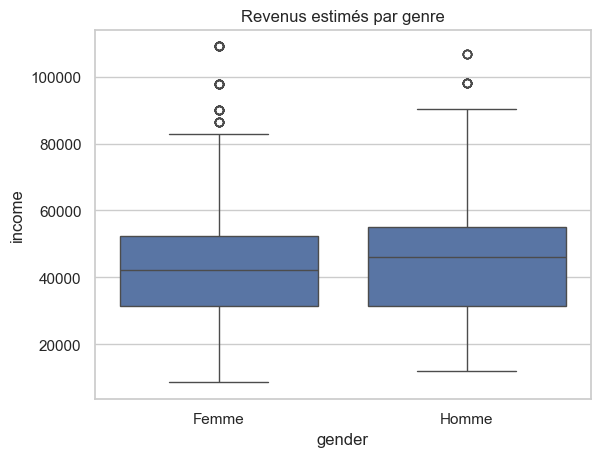

In [23]:
# Revenus / SAT : distributions et comparaisons par genre
sns.boxplot(x="gender", y="income", data=df)
plt.xticks([0,1], ["Femme", "Homme"])
plt.title("Revenus estimés par genre")
plt.show()

income_category
NaN                   4099
$40,000-$50,000        993
$30,000-$40,000        939
$50,000-$60,000        812
$20,000-$30,000        655
$60,000-$70,000        285
$70,000-$80,000        214
$10,000-$20,000        191
$80,000-$90,000        121
$90,000-$100,000        36
More than $100,000      24
Less than $10,000        9
Name: count, dtype: int64


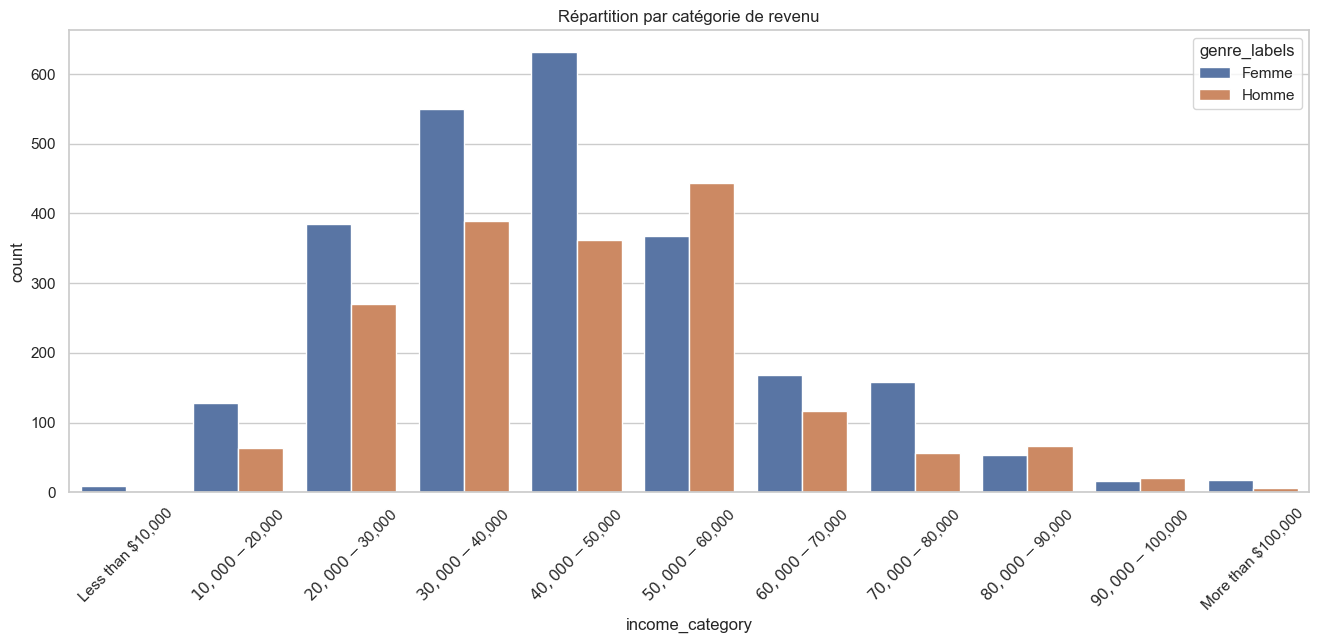

In [24]:
bins = [0, 10000, 20000, 30000, 40000, 50000,
        60000, 70000, 80000, 90000, 100000, float("inf")]
labels = ["Less than $10,000",
          "$10,000-$20,000",
          "$20,000-$30,000",
          "$30,000-$40,000",
          "$40,000-$50,000",
          "$50,000-$60,000",
          "$60,000-$70,000",
          "$70,000-$80,000",
          "$80,000-$90,000",
          "$90,000-$100,000",
          "More than $100,000"]

df["income_category"] = pd.cut(df["income"], bins=bins, labels=labels, include_lowest=True)

# Vérif
print(df["income_category"].value_counts(dropna=False))

plt.figure(figsize=(16,6))
sns.countplot(x="income_category", data=df, order=labels, hue="genre_labels")
plt.title("Répartition par catégorie de revenu")
plt.xticks(rotation=45)
plt.show()

# Habitudes et comportements

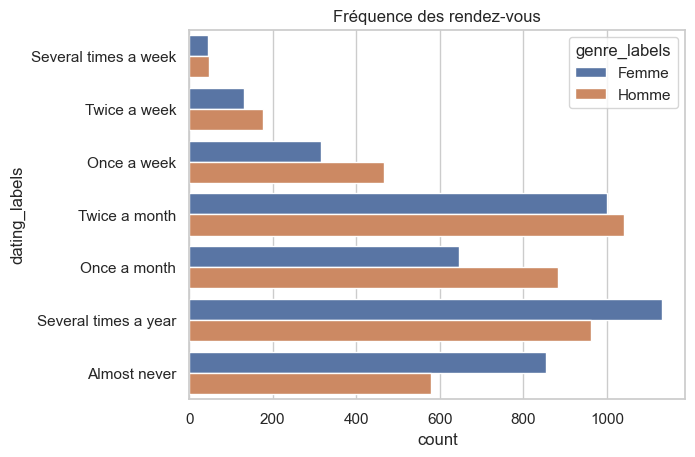

In [25]:
# Fréquence des rendez-vous
dating_labels = {
    1:"Several times a week", 2:"Twice a week", 3:"Once a week", 4:"Twice a month", 
    5:"Once a month", 6:"Several times a year", 7:"Almost never"
}
df["dating_labels"] = df["date"].map(dating_labels)

order = [
    "Several times a week",
    "Twice a week",
    "Once a week",
    "Twice a month",
    "Once a month",
    "Several times a year",
    "Almost never"
]

sns.countplot(y="dating_labels", data=df, order=order, hue="genre_labels",)
plt.title("Fréquence des rendez-vous")
plt.show()

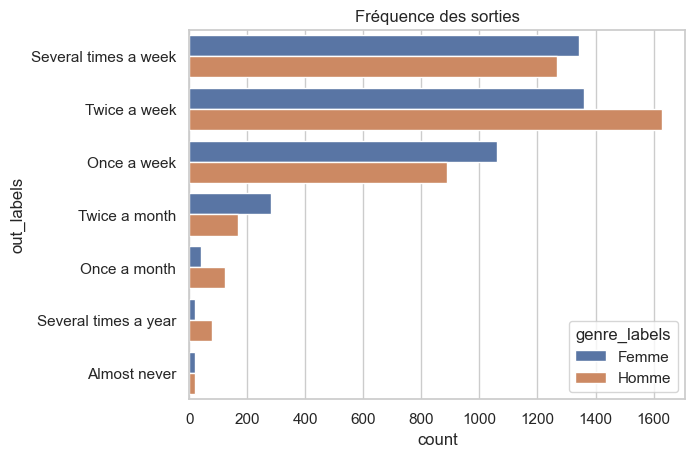

In [26]:
# Fréquence des sorties (hors dating)
out_labels = {
    1:"Several times a week", 2:"Twice a week", 3:"Once a week", 4:"Twice a month", 
    5:"Once a month", 6:"Several times a year", 7:"Almost never"
}
df["out_labels"] = df["go_out"].map(out_labels)

order = [
    "Several times a week",
    "Twice a week",
    "Once a week",
    "Twice a month",
    "Once a month",
    "Several times a year",
    "Almost never"
]

sns.countplot(y="out_labels", data=df, order=order, hue="genre_labels",)
plt.title("Fréquence des sorties")
plt.show()

In [27]:
df.groupby("gender")["go_out"].mean()

gender
0    2.139394
1    2.176569
Name: go_out, dtype: Float64

movies      7.919629
music       7.851066
dining      7.783829
reading     7.678515
museums     6.985781
concerts    6.825401
theater     6.776118
art         6.714544
sports      6.425232
exercise    6.245813
clubbing    5.745993
hiking      5.737077
shopping    5.631281
tv          5.304133
tvsports    4.575491
yoga        4.339197
gaming      3.881191
dtype: Float64


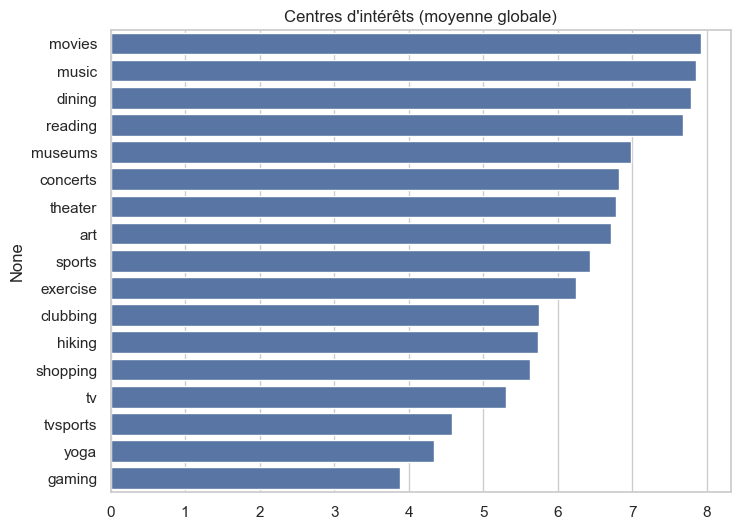

In [28]:
# Centres d’intérêts : moyenne et profils types par genre
interests = ["sports","tvsports","exercise","dining","museums","art",
             "hiking","gaming","clubbing","reading","tv","theater",
             "movies","concerts","music","shopping","yoga"]

# Moyenne
interest_moyenne = df[interests].mean().sort_values(ascending=False)
print(interest_moyenne)

plt.figure(figsize=(8,6))
sns.barplot(x=interest_moyenne.values, y=interest_moyenne.index)
plt.title("Centres d'intérêts (moyenne globale)")
plt.show()

In [29]:
df.groupby("gender")[interests].mean()

,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
gender,,,,,,,,,,,,,,,,,
0,5.813333,4.162424,6.450909,8.147152,7.428364,7.219636,5.942061,3.302303,5.899879,7.907152,5.739394,7.481939,8.198061,7.103758,7.989576,6.499152,4.989818
1,7.029947,4.983709,6.043124,7.424772,6.548395,6.215381,5.534499,4.453282,5.593915,7.452563,4.873982,6.078582,7.644466,6.550311,7.714183,4.773598,3.696215


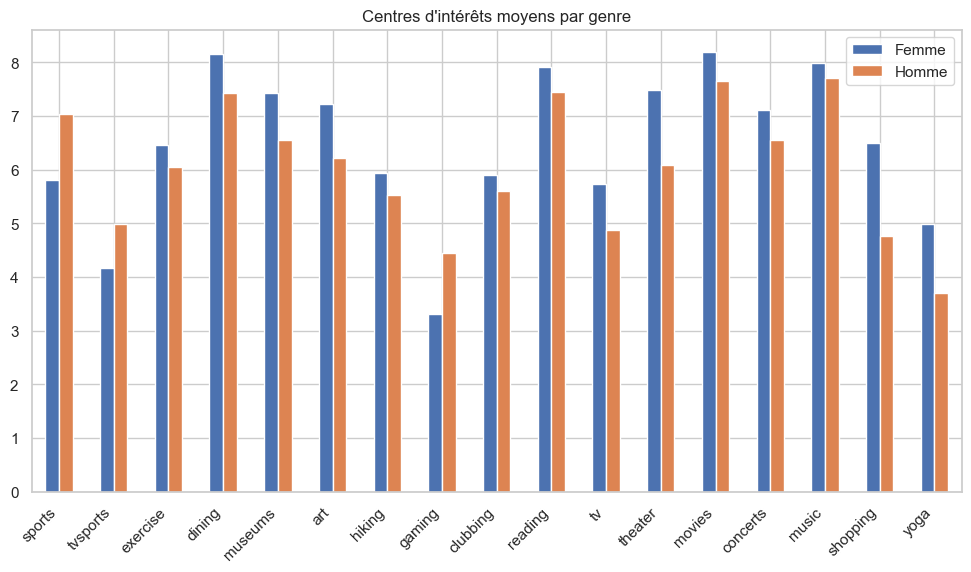

In [30]:
df.groupby("gender")[interests].mean().T.plot(kind="bar", figsize=(12,6))
plt.title("Centres d'intérêts moyens par genre")
plt.xticks(rotation=45, ha="right")
plt.legend(["Femme","Homme"])
plt.show()

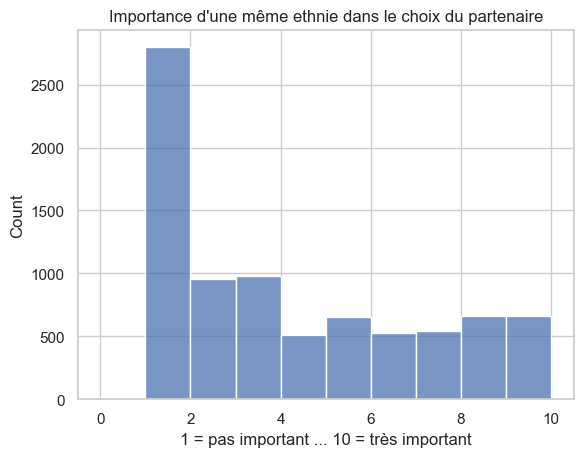

In [31]:
# Importance de l'ethnie' ou religion
sns.histplot(df["imprace"], bins=10, kde=False)
plt.title("Importance d'une même ethnie dans le choix du partenaire")
plt.xlabel("1 = pas important ... 10 = très important")
plt.show()

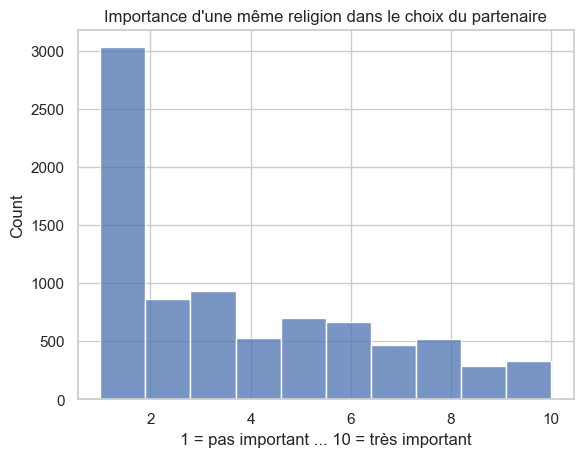

In [32]:
sns.histplot(df["imprelig"], bins=10, kde=False)
plt.title("Importance d'une même religion dans le choix du partenaire")
plt.xlabel("1 = pas important ... 10 = très important")
plt.show()

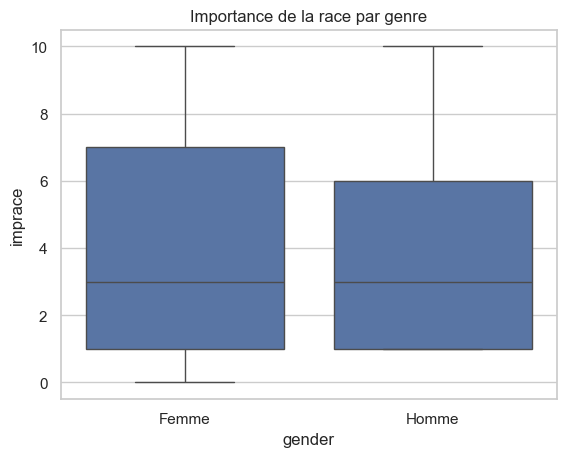

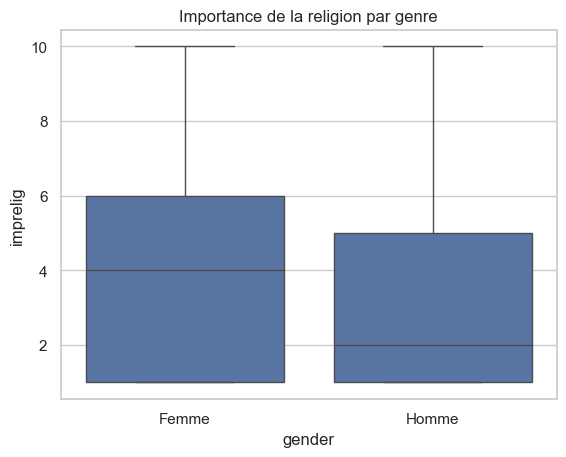

In [33]:
# Comparaison par genre
sns.boxplot(x="gender", y="imprace", data=df)
plt.xticks([0,1], ["Femme","Homme"])
plt.title("Importance de la race par genre")
plt.show()

sns.boxplot(x="gender", y="imprelig", data=df)
plt.xticks([0,1], ["Femme","Homme"])
plt.title("Importance de la religion par genre")
plt.show()

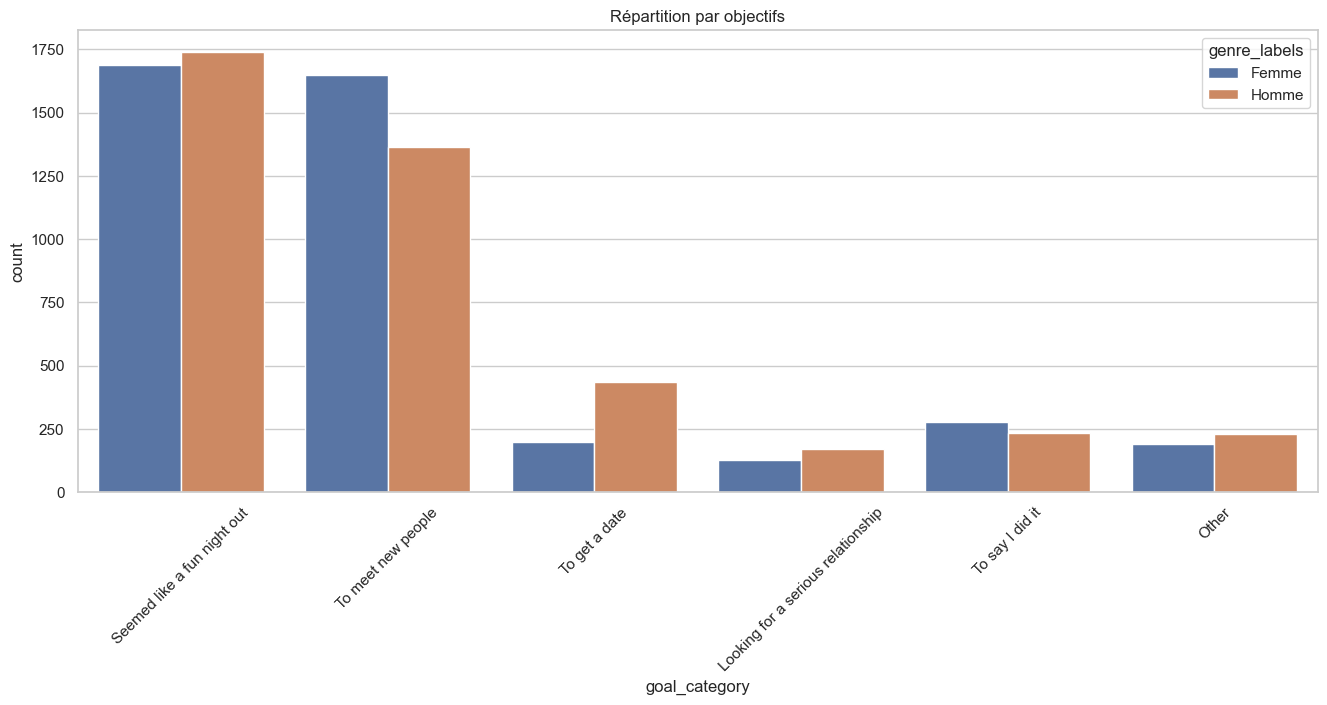

In [34]:
# Objectif des rencontres
objectifs_labels = {
    1: "Seemed like a fun night out",
    2: "To meet new people",
    3: "To get a date",
    4: "Looking for a serious relationship",
    5: "To say I did it",
    6: "Other"
}

df["goal_category"] = df["goal"].map(objectifs_labels).fillna("n/a")

objectifs_order = ["Seemed like a fun night out",
                  "To meet new people",
                  "To get a date",
                  "Looking for a serious relationship",
                  "To say I did it",
                  "Other"]


plt.figure(figsize=(16,6))
sns.countplot(x="goal_category", data=df, order=objectifs_order, hue="genre_labels")
plt.title("Répartition par objectifs")
plt.xticks(rotation=45)
plt.show()

# Préférences déclarées (avant l’événement)

In [35]:
# subset pour les préférences déclarées (waves 6–9) / échelle de notation de 1 à 10
df_wave_6_9 = df[df["wave"].between(6, 9)].copy()
print(df_wave_6_9.shape)
print(df_wave_6_9["wave"].value_counts())

(1562, 202)
wave
9    800
7    512
8    200
6     50
Name: count, dtype: Int64


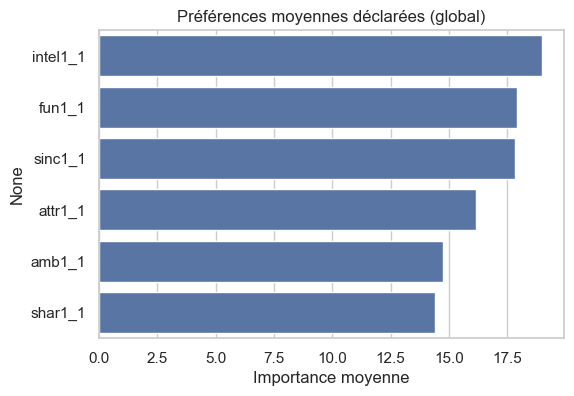

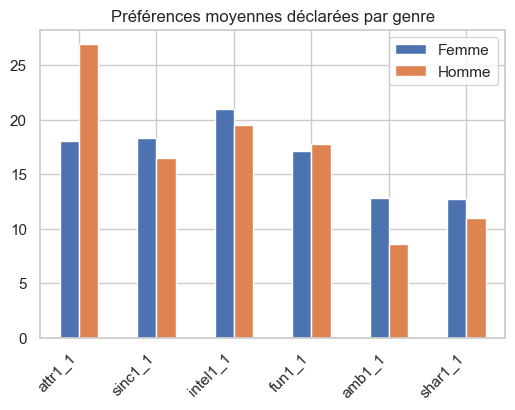

In [36]:
# Pondération des attributs recherchés
prefs = ["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]

# Moyenne globale
prefs_mean = df_wave_6_9[prefs].mean().sort_values(ascending=False)
prefs_mean

plt.figure(figsize=(6,4))
sns.barplot(x=prefs_mean.values, y=prefs_mean.index)
plt.title("Préférences moyennes déclarées (global)")
plt.xlabel("Importance moyenne")
plt.show()

# Moyenne par genre
df.groupby("gender")[prefs].mean().T.plot(kind="bar", figsize=(6,4))
plt.title("Préférences moyennes déclarées par genre")
plt.xticks(rotation=45, ha="right")
plt.legend(["Femme","Homme"])
plt.show()

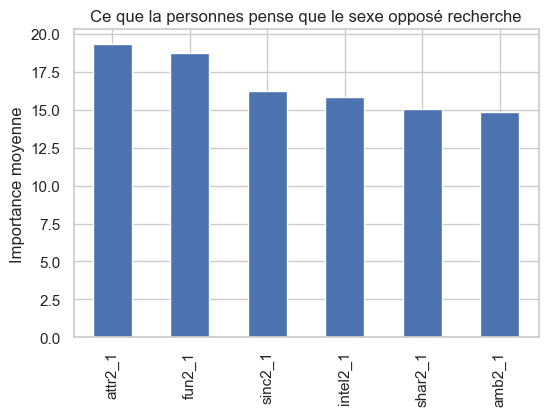

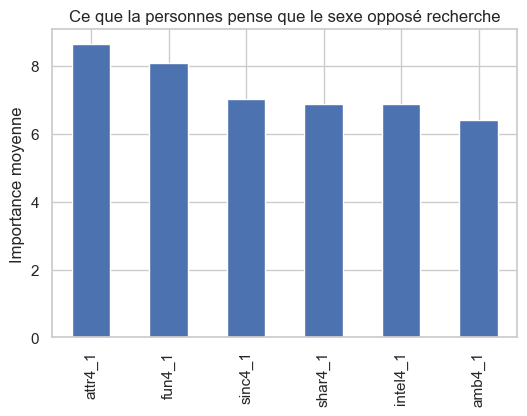

In [37]:
# Perception de ce que les autres recherchent
# attr2_1 … shar2_1 → ce que la personne pense que le sexe opposé recherche
# attr4_1 … shar4_1 → ce que la personne pense que ses pairs recherchent

prefs_autres = ["attr2_1","sinc2_1","intel2_1","fun2_1","amb2_1","shar2_1"]
prefs_pairs  = ["attr4_1","sinc4_1","intel4_1","fun4_1","amb4_1","shar4_1"]

# Moyenne perception sexe opposé
df_wave_6_9[prefs_autres].mean().sort_values(ascending=False).plot(kind="bar", figsize=(6,4))
plt.title("Ce que la personnes pense que le sexe opposé recherche")
plt.ylabel("Importance moyenne")
plt.show()

# Moyenne perception des pairs
df_wave_6_9[prefs_pairs].mean().sort_values(ascending=False).plot(kind="bar", figsize=(6,4))
plt.title("Ce que la personnes pense que le sexe opposé recherche")
plt.ylabel("Importance moyenne")
plt.show()


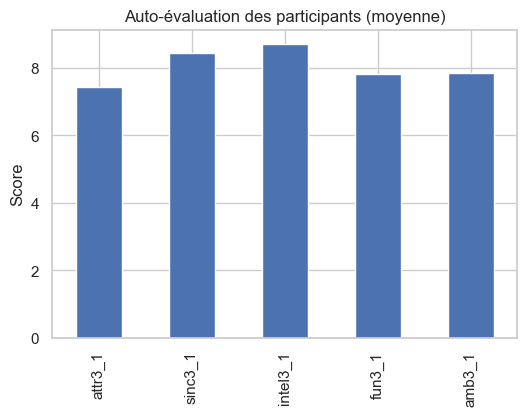

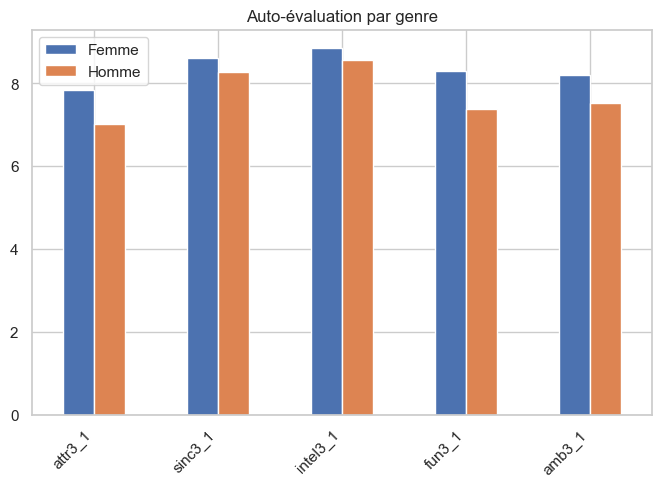

In [38]:
# Auto-évaluation
auto_eval = ["attr3_1","sinc3_1","intel3_1","fun3_1","amb3_1"]

df_wave_6_9[auto_eval].mean().plot(kind="bar", figsize=(6,4))
plt.title("Auto-évaluation des participants (moyenne)")
plt.ylabel("Score")
plt.show()

df_wave_6_9.groupby("gender")[auto_eval].mean().T.plot(kind="bar", figsize=(8,5))
plt.title("Auto-évaluation par genre")
plt.xticks(rotation=45, ha="right")
plt.legend(["Femme","Homme"])
plt.show()

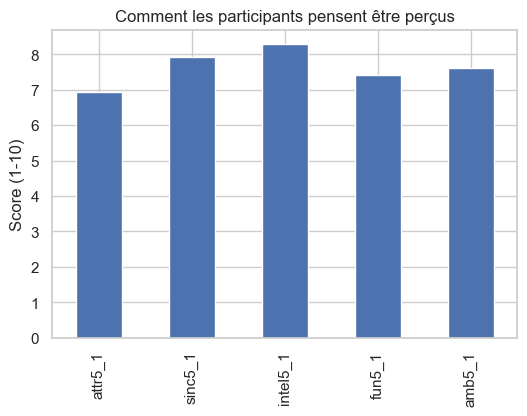

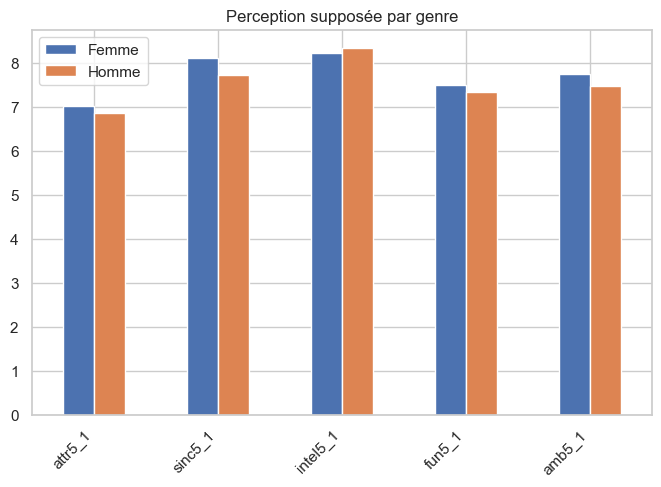

In [39]:
# Perception de soi par les autres
perc_autres = ["attr5_1","sinc5_1","intel5_1","fun5_1","amb5_1"]

df[perc_autres].mean().plot(kind="bar", figsize=(6,4))
plt.title("Comment les participants pensent être perçus")
plt.ylabel("Score (1-10)")
plt.show()

df.groupby("gender")[perc_autres].mean().T.plot(kind="bar", figsize=(8,5))
plt.title("Perception supposée par genre")
plt.xticks(rotation=45, ha="right")
plt.legend(["Femme","Homme"])
plt.show()

# Pendant le speed-dating

- le taux de “Yes” par genre,
- la perception du partenaire,
- les facteurs qui influencent un “Yes” (âge, race, attractivité, sincérité, etc.),
- la distribution des notes données pendant le speed-dating.

In [40]:
# Taux de "Yes" (choix du partenaire)
# Taux global
yes_rate = df["dec_o"].mean() * 100
print(f"Taux global de 'Yes' : {yes_rate:.1f}%")

# Par genre
yes_par_genre = df.groupby("genre_labels")["dec_o"].mean() * 100
print("Taux de 'Yes' par genre :\n", yes_par_genre)

Taux global de 'Yes' : 42.0%
Taux de 'Yes' par genre :
 genre_labels
Femme    47.466539
Homme    36.456843
Name: dec_o, dtype: Float64


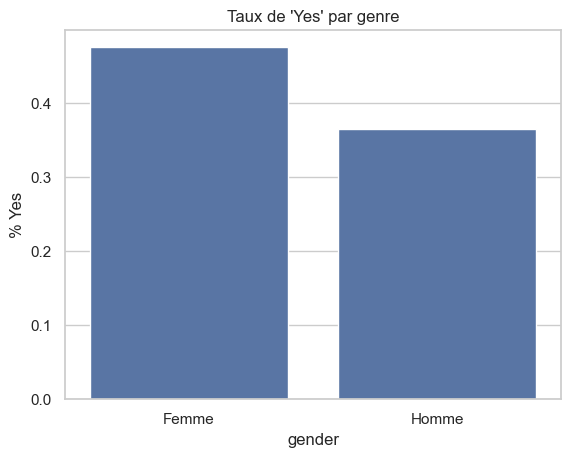

In [41]:
sns.barplot(x="gender", y="dec_o", data=df, errorbar=None)
plt.xticks([0,1], ["Femme","Homme"])
plt.ylabel("% Yes")
plt.title("Taux de 'Yes' par genre")
plt.show()    

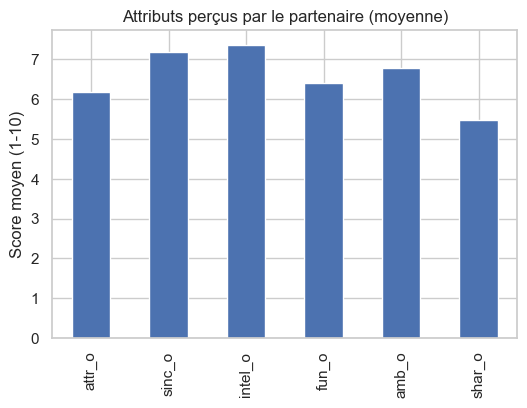

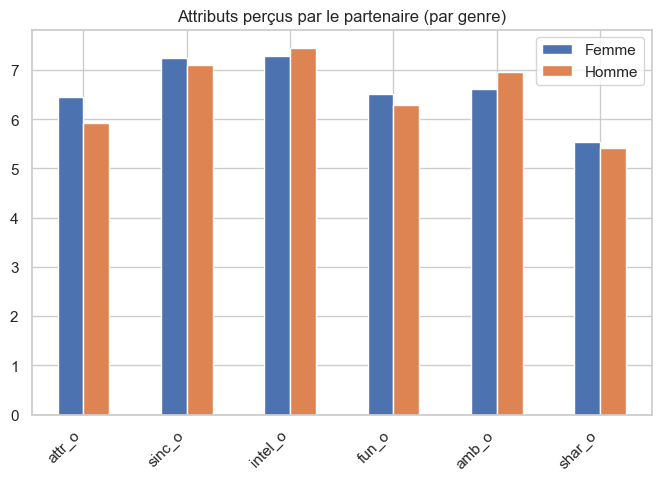

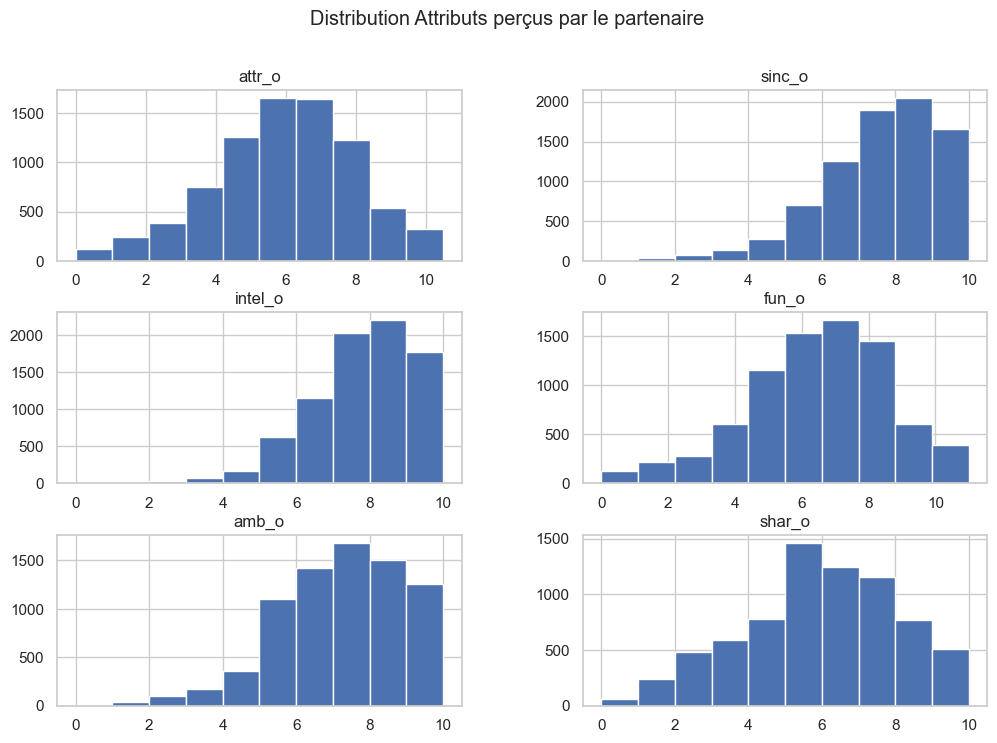

In [42]:
# Attributs perçus par le partenaire
partenaire_attrs = ["attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o"]

df[partenaire_attrs].mean().plot(kind="bar", figsize=(6,4))
plt.title("Attributs perçus par le partenaire (moyenne)")
plt.ylabel("Score moyen (1-10)")
plt.show()

df.groupby("gender")[partenaire_attrs].mean().T.plot(kind="bar", figsize=(8,5))
plt.title("Attributs perçus par le partenaire (par genre)")
plt.xticks(rotation=45, ha="right")
plt.legend(["Femme","Homme"])
plt.show()

df[partenaire_attrs].hist(bins=10, figsize=(12,8))
plt.suptitle("Distribution Attributs perçus par le partenaire")
plt.show()

dec_o       1.000000
attr_o      0.486885
fun_o       0.414276
shar_o      0.400501
intel_o     0.216704
sinc_o      0.209811
amb_o       0.183216
samerace    0.023626
age_o       0.015128
Name: dec_o, dtype: float64


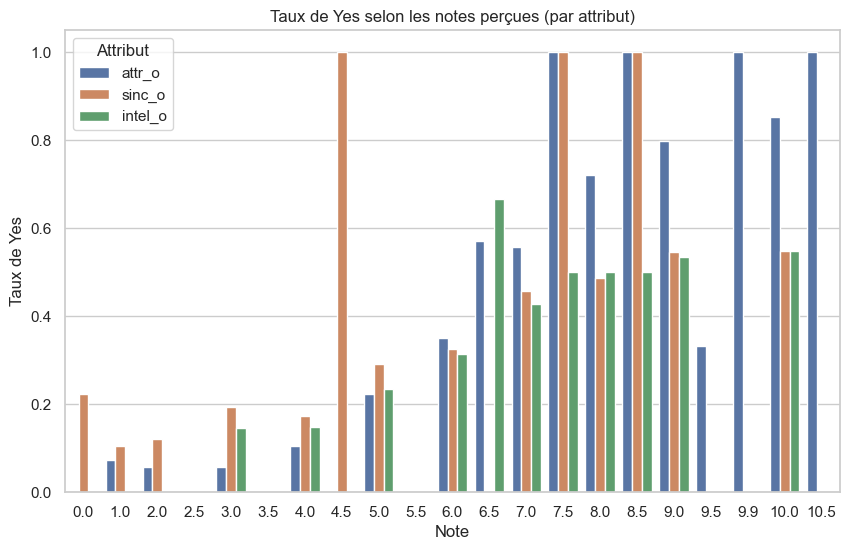

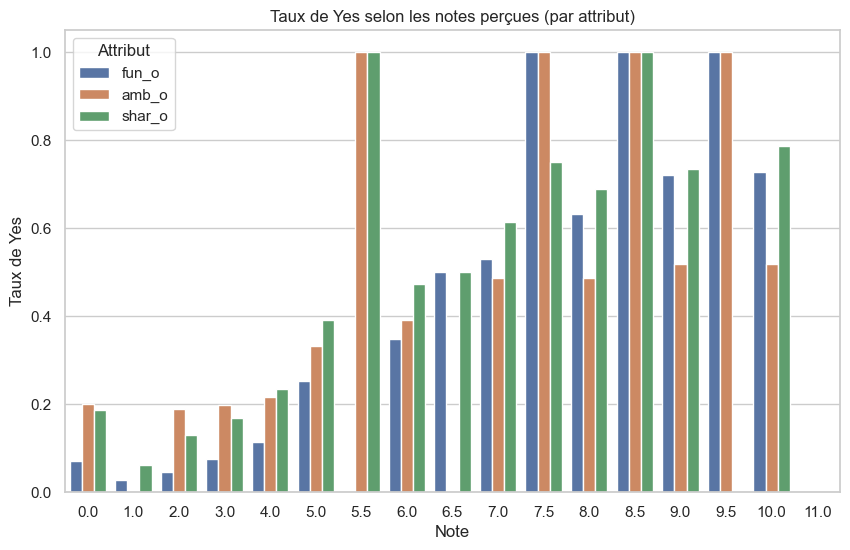

In [43]:
# Facteurs corrélés au "Yes" (ce qui influence la décision)
corrs = df[["dec_o","age_o","samerace"] + partenaire_attrs].corr()["dec_o"].sort_values(ascending=False)
print(corrs)

partenaire_attrs_reduce_01 = ["attr_o","sinc_o","intel_o"]
partenaire_attrs_reduce_02 = ["fun_o","amb_o","shar_o"]

df_long_01 = df.melt(id_vars=["dec_o"], value_vars=partenaire_attrs_reduce_01, 
                  var_name="Attribut", value_name="Note")

df_long_02 = df.melt(id_vars=["dec_o"], value_vars=partenaire_attrs_reduce_02, 
                  var_name="Attribut", value_name="Note")

plt.figure(figsize=(10,6))
sns.barplot(x="Note", y="dec_o", hue="Attribut", data=df_long_01, errorbar=None)
plt.title("Taux de Yes selon les notes perçues (par attribut)")
plt.ylabel("Taux de Yes")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x="Note", y="dec_o", hue="Attribut", data=df_long_02, errorbar=None)
plt.title("Taux de Yes selon les notes perçues (par attribut)")
plt.ylabel("Taux de Yes")
plt.show()

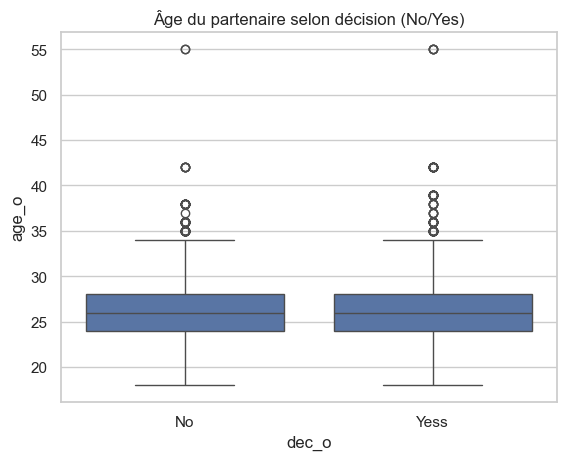

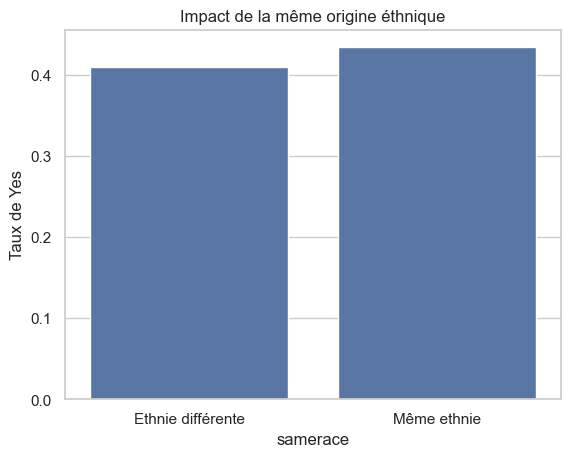

In [44]:
# Age et ethinicité
sns.boxplot(x="dec_o", y="age_o", data=df)
plt.title("Âge du partenaire selon décision (No/Yes)")
plt.xticks([0,1], ["No","Yess"])
plt.show()

sns.barplot(x="samerace", y="dec_o", data=df, errorbar=None)
plt.xticks([0,1], ["Ethnie différente","Même ethnie"])
plt.ylabel("Taux de Yes")
plt.title("Impact de la même origine éthnique")
plt.show()

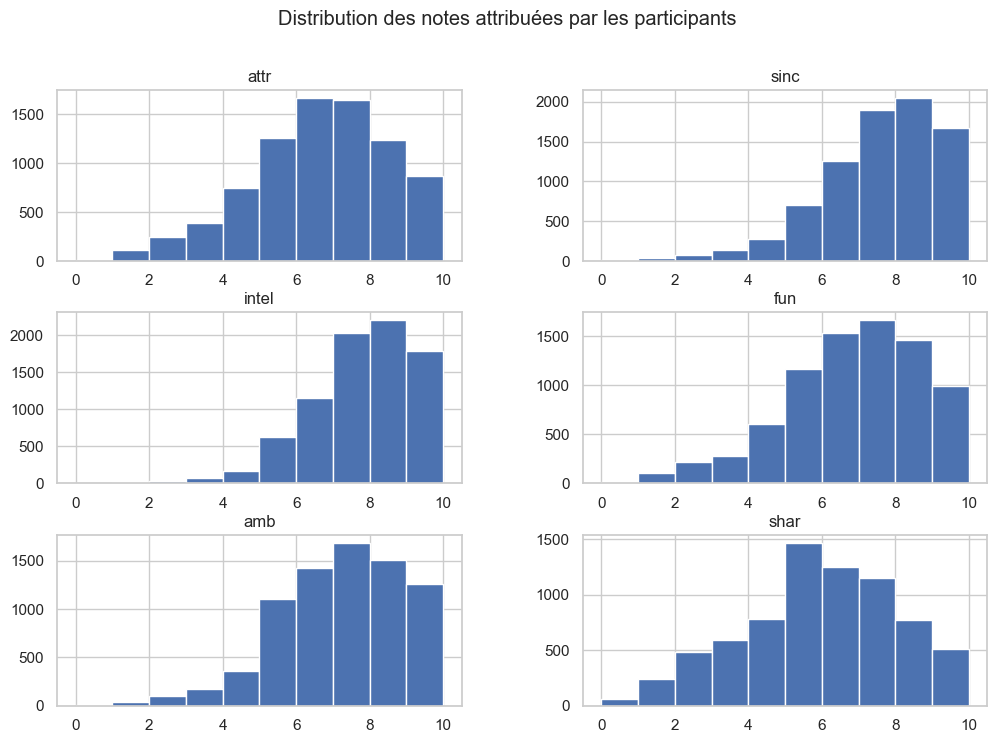

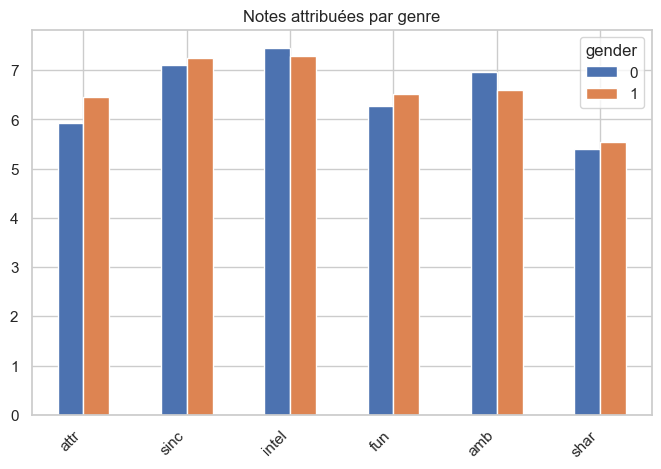

In [45]:
# Distribution des notes par attribut (scorecard du participant
notes = ["attr","sinc","intel","fun","amb","shar"]

# Distribution par attribut
df[notes].hist(bins=10, figsize=(12,8))
plt.suptitle("Distribution des notes attribuées par les participants")
plt.show()

# Moyenne par genre
df.groupby("gender")[notes].mean().T.plot(kind="bar", figsize=(8,5))
plt.title("Notes attribuées par genre")
plt.xticks(rotation=45, ha="right")
plt.show()

# Matching effectif

- Taux de match global
- Différences H/F
- Attributs perçus et corrélation des matchs effectifs avec les préférences déclarées.
- Similarités (âge proche, même race, centres d’intérêt corrélés)

Taux global de match : 16.5%


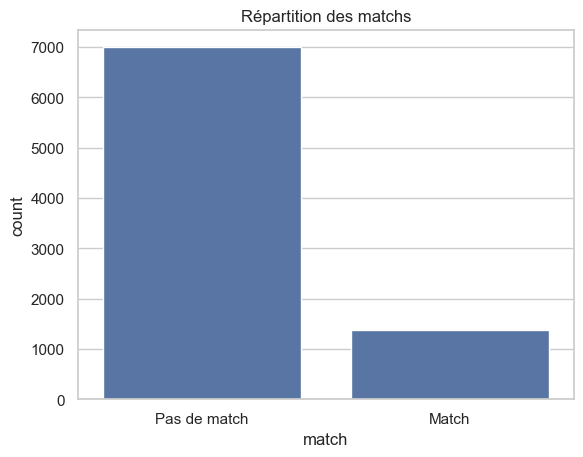

In [46]:
# Taux de match global
match_rate = df["match"].mean() * 100
print(f"Taux global de match : {match_rate:.1f}%")

sns.countplot(x="match", data=df)
plt.xticks([0,1], ["Pas de match", "Match"])
plt.title("Répartition des matchs")
plt.show()

Taux de match par genre :
 gender
0    16.491396
1    16.452074
Name: match, dtype: Float64


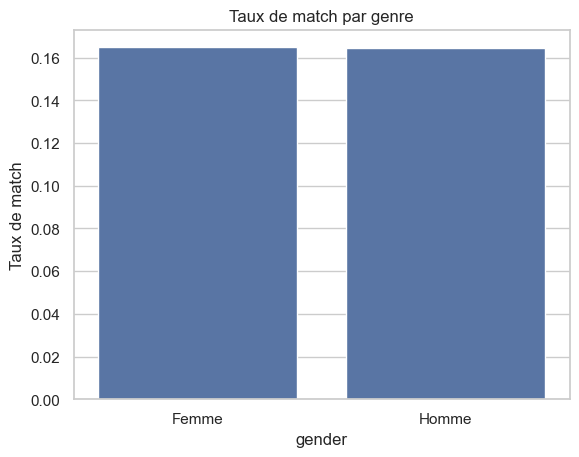

In [47]:
# Différences hommes / femmes
match_par_genre = df.groupby("gender")["match"].mean() * 100
print("Taux de match par genre :\n", match_par_genre)

sns.barplot(x="gender", y="match", data=df, errorbar=None)
plt.xticks([0,1], ["Femme","Homme"])
plt.ylabel("Taux de match")
plt.title("Taux de match par genre")
plt.show()

    wave  match
0      1   31.0
1      2   10.0
2      3   13.0
3      4   20.0
4      5   28.0
5      6   20.0
6      7   17.0
7      8   18.0
8      9   16.0
9     10   19.0
10    11   15.0
11    12   11.0
12    13   18.0
13    14   18.0
14    15   18.0
15    16   25.0
16    17   17.0
17    18    8.0
18    19   16.0
19    20   12.0
20    21   15.0


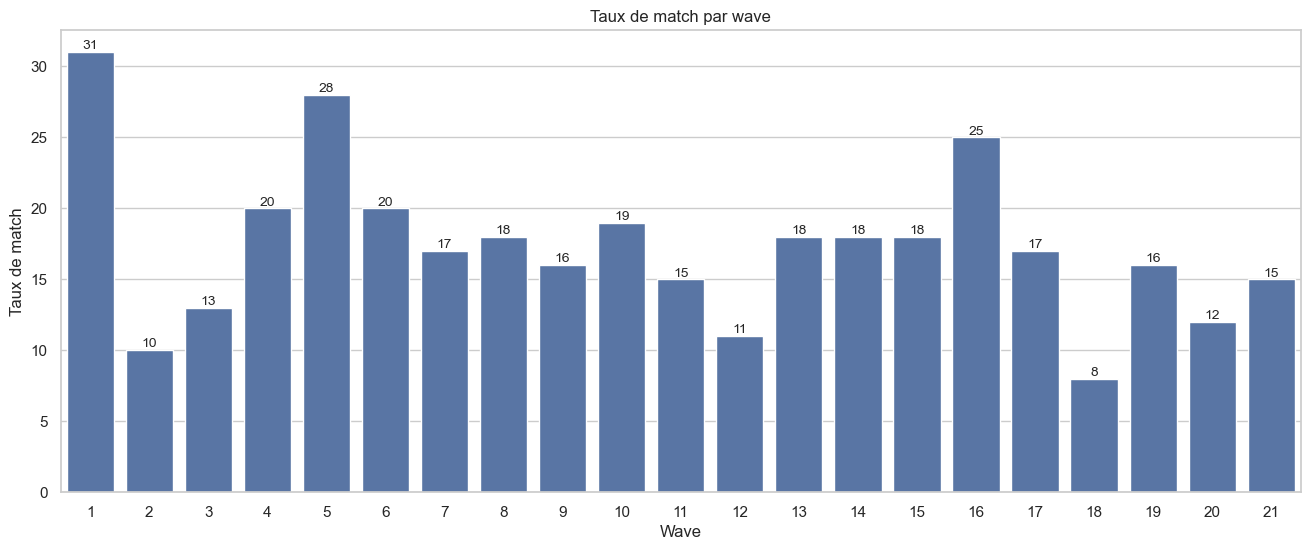

In [ ]:
# Taux de match par wave
taux_match_wave = df.groupby("wave")["match"].mean().reset_index()
taux_match_wave["match"] = round(taux_match_wave["match"] * 100)
print(taux_match_wave)

plt.figure(figsize=(16, 6))
ax=sns.barplot(
    data=taux_match_wave, 
    x="wave", 
    y="match",
    estimator="sum"
)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel("Wave")
plt.ylabel("Taux de match")
plt.title("Taux de match par wave")
plt.show()

match       1.000000
fun         0.277545
shar        0.270679
attr        0.260676
intel       0.169532
sinc        0.164449
amb         0.140042
fun1_1      0.041652
attr1_1     0.014950
intel1_1    0.014087
amb1_1     -0.004444
sinc1_1    -0.032325
shar1_1    -0.048318
Name: match, dtype: float64


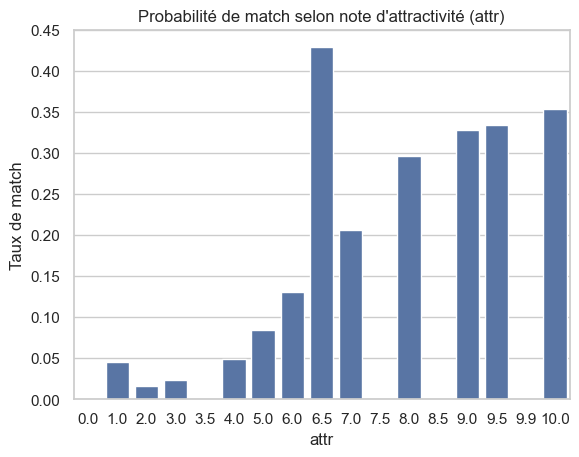

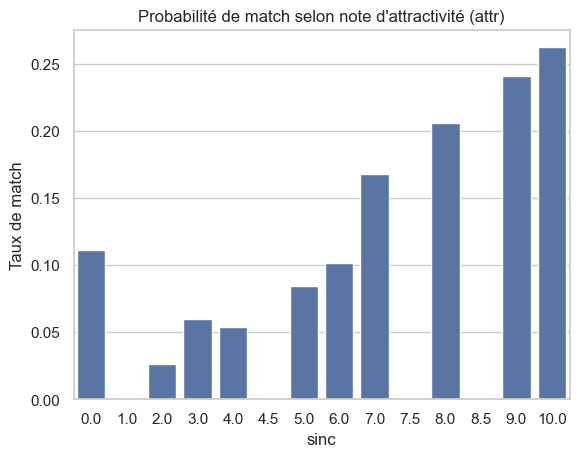

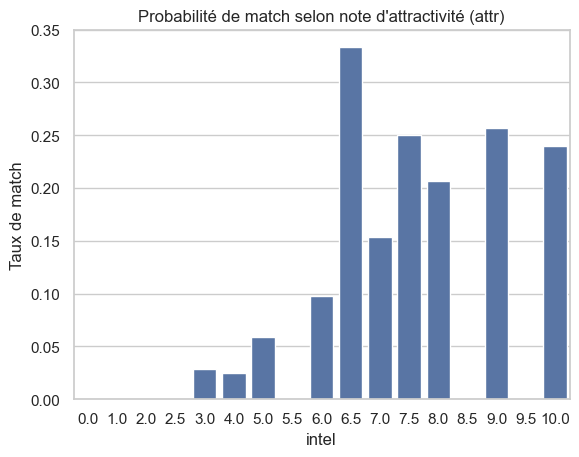

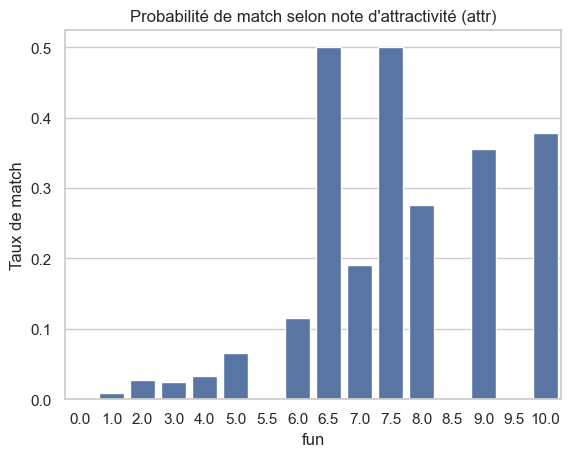

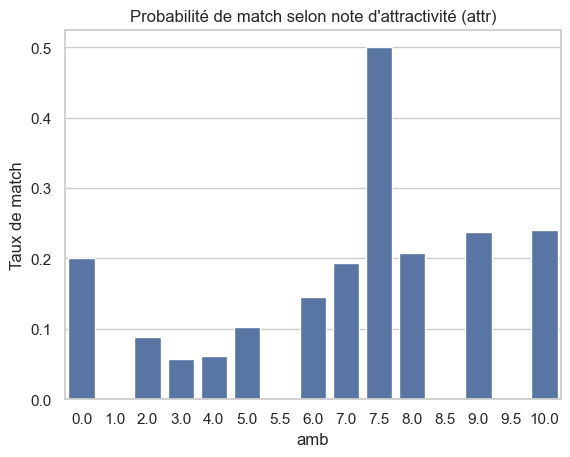

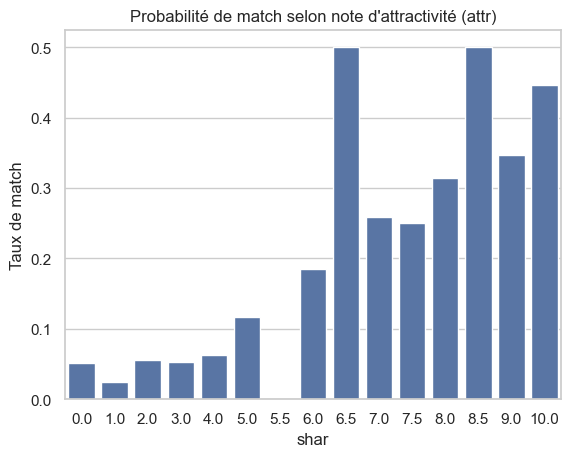

In [49]:
# Analyse croisée : préférences déclarées vs comportements réels
prefs = ["attr1_1","sinc1_1","intel1_1","fun1_1","amb1_1","shar1_1"]
notes = ["attr","sinc","intel","fun","amb","shar"]

corrs = df[prefs + notes + ["match"]].corr()["match"].sort_values(ascending=False)
print(corrs)

# Attractivité
sns.barplot(x="attr", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()

# Sincérité
sns.barplot(x="sinc", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()

# Intelligence
sns.barplot(x="intel", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()

# Fun
sns.barplot(x="fun", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()

# Ambitious
sns.barplot(x="amb", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()

# Shared Interests
sns.barplot(x="shar", y="match", data=df, errorbar=None)
plt.title("Probabilité de match selon note d'attractivité (attr)")
plt.ylabel("Taux de match")
plt.show()


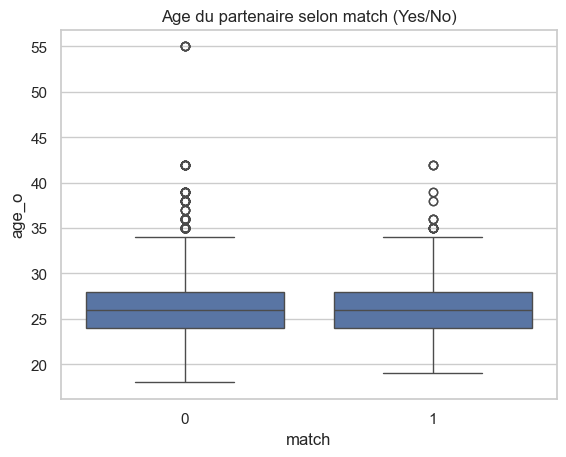

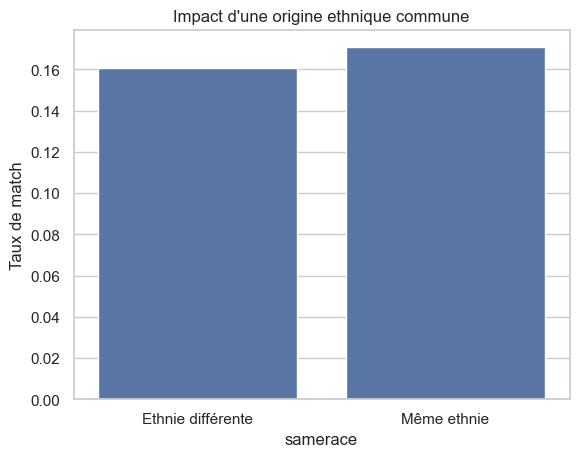

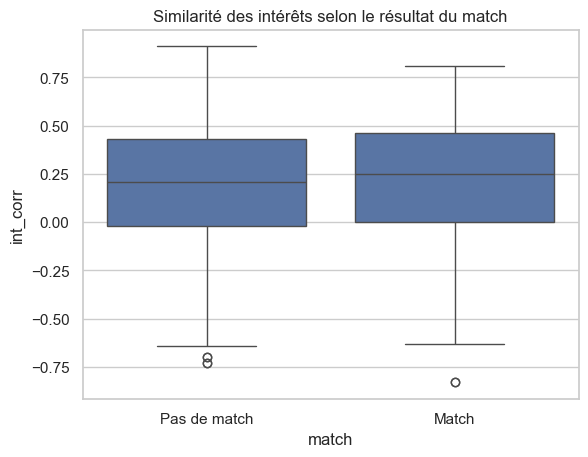

match
0    0.191822
1    0.217319
Name: int_corr, dtype: Float64
-0.83
0.91


In [50]:
# Importance des similarités
# Age
sns.boxplot(x="match", y="age_o", data=df)
plt.title("Age du partenaire selon match (Yes/No)")
plt.show()

# Ethnie
sns.barplot(x="samerace", y="match", data=df, errorbar=None)
plt.xticks([0,1], ["Ethnie différente","Même ethnie"])
plt.ylabel("Taux de match")
plt.title("Impact d'une origine ethnique commune")
plt.show()

# Intérêts communs
sns.boxplot(x="match", y="int_corr", data=df)
plt.xticks([0,1], ["Pas de match","Match"])
plt.title("Similarité des intérêts selon le résultat du match")
plt.show()

print(df.groupby("match")["int_corr"].mean())
print(df["int_corr"].min())
print(df["int_corr"].max())

Suivi après l’événement

In [51]:
# Satisfaction
df["satis_2"].describe()

count      7463.0
mean      5.71151
std      1.820764
min           1.0
25%           5.0
50%           6.0
75%           7.0
max          10.0
Name: satis_2, dtype: Float64

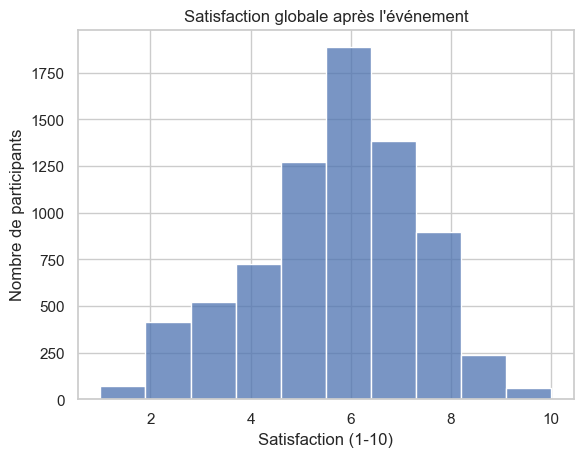

In [52]:
sns.histplot(df["satis_2"].dropna(), bins=10, kde=False)
plt.title("Satisfaction globale après l'événement")
plt.xlabel("Satisfaction (1-10)")
plt.ylabel("Nombre de participants")
plt.show()

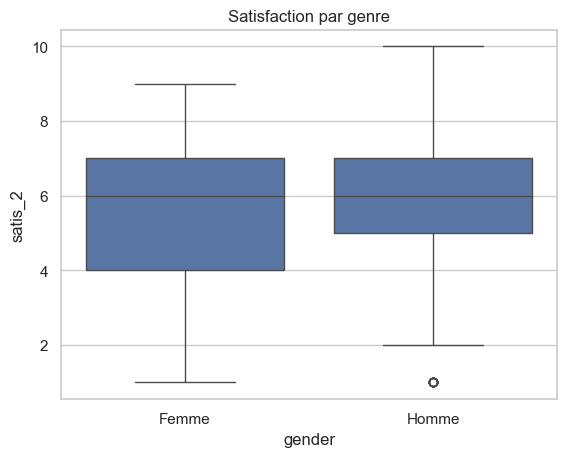

In [53]:
sns.boxplot(x="gender", y="satis_2", data=df)
plt.xticks([0,1], ["Femme","Homme"])
plt.title("Satisfaction par genre")
plt.show()

Pourcentage de participants ayant eu au moins un rendez-vous : 37.7%


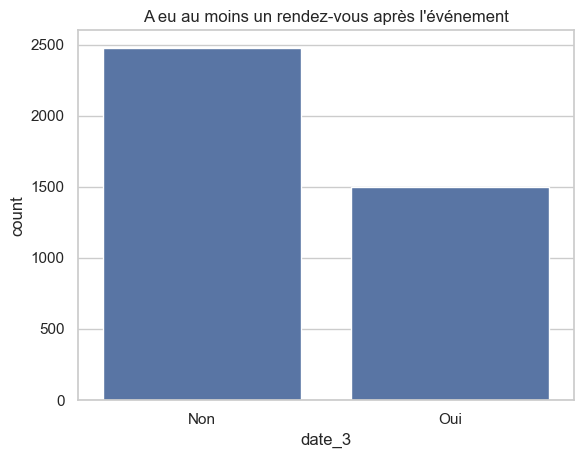

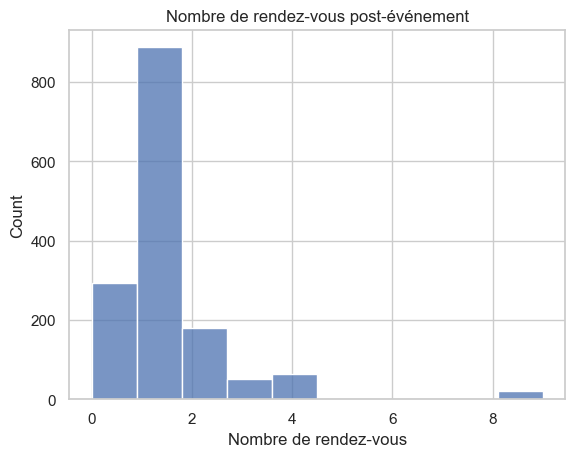

In [54]:
# Nombre de rendez-vous réels
# date_3 = a eu au moins un rendez-vous avec un match
# numdat_3 = nombre de rendez-vous (si oui)

# Taux de personnes ayant eu au moins un rendez-vous
date3_rate = (df["date_3"] == 1).mean() * 100
print(f"Pourcentage de participants ayant eu au moins un rendez-vous : {date3_rate:.1f}%")

sns.countplot(x="date_3", data=df)
plt.xticks([0,1], ["Non","Oui"])
plt.title("A eu au moins un rendez-vous après l'événement")
plt.show()

# Distribution du nombre de rendez-vous
sns.histplot(df["numdat_3"].dropna(), bins=10, kde=False)
plt.title("Nombre de rendez-vous post-événement")
plt.xlabel("Nombre de rendez-vous")
plt.show()

In [55]:
# Taux de concrétisation
# Moyenne de contacts initiés et reçus
print("Contacts initiés :", df["you_call"].mean())
print("Contacts reçus :", df["them_cal"].mean())

df["taux_contact"] = df["you_call"] / df["match"].replace(0, pd.NA)
df["taux_rdv"] = df["numdat_3"] / df["match"].replace(0, pd.NA)

print("Taux moyen de contact par match :", df["taux_contact"].mean())
print("Taux moyen de rendez-vous par match :", df["taux_rdv"].mean())

Contacts initiés : 0.7808253648716659
Contacts reçus : 0.9816305988928032
Taux moyen de contact par match : 1.0725462304409672
Taux moyen de rendez-vous par match : 1.510703363914373
